# Hangman Game

In this experiment, we look into the hangman game and how we can solve it by fomrulating the problem using **Bayesian Network**. In the game of Hangman, the letters of a word is predicted one by one. Each letter can either come under *Correct guess* and *Incorrect guess*. After some trials, we would end up with a list of letters under each list. We are interested in identifying the next best guess given that we have 1) List of correct guess 2) List of incorrect guess. 

In this work, lets restrict to five letter words. We have a dictionary of five letter words with its frequency. With this information, we can find the *prior probability* of the words. 

$$
P(W = w) = \frac{\text{COUNT}(w)}{\sum_{w'} \text{COUNT}(w')}
$$

We are interested in finding letter $\ell$ which *maximizes* the conditional probability  
$$
P\left(
L_j = \ell \mid 
L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG}
\right)
$$
Where 
$$j - \text{Locations where letters are not found}\\i - \text{Locations where letters are found}\\\text{CG - Set of Correct Guess}\\\text{IG - Set of Incorrect Guess}$$
To find this, we introduce new information we have with the dictionary
$$
\begin{aligned}
P\left(
L_j = \ell \mid 
L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG}
\right) & = \sum_w P\left(W = w, \
L_j = \ell \mid 
L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG}
\right)\\
& = \sum_w P \left (L_j = \ell \mid W = w\right)P\left(W = w \
\mid 
L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG}
\right)
\end{aligned}
$$
The probability that a letter exist at i th location in word w can be found out by
$$
P(L_i = \ell \mid W = w) =
\begin{cases}
1 & \text{if } \ell \text{ is the } i\text{th letter of } w, \\
0 & \text{otherwise}.
\end{cases}
$$
The probability that word W could be $w$, given the locations and guesses in the word can be obtained using Bayes rule

$$
P\left(W = w \
\mid 
L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG}
\right) = \frac{
P(L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG} \mid W = w) \cdot P(W = w)
}{
P(L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG})
}
$$
and the denomiator is just marginalization of numerator with respect to w
$$P(L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG}) = \sum_w P(L_i = \text{CG}, \
L_j \notin \text{CG} \cup \text{IG} \mid W = w) \cdot P(W = w)$$ 



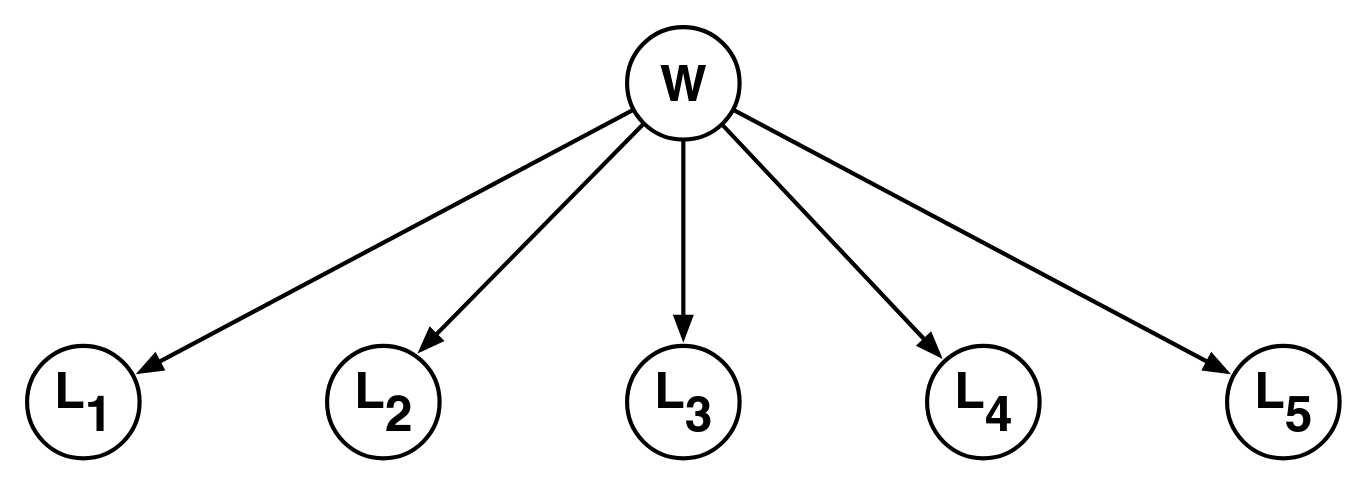

In [1]:
import pandas as pd
import string
import numpy as np

In [2]:
df=pd.read_csv('hw1_word_counts_05.txt',sep =' ',names =['Word','Count'])

In [3]:
total_sum = df['Count'].sum()
df['Prior_prob']=df['Count']/total_sum
df.head()

,Word,Count,Prior_prob
0,AARON,413,0.000054
1,ABABA,199,0.000026
2,ABACK,64,0.000008
3,ABATE,69,0.000009
4,ABBAS,290,0.000038


In [4]:
df.sort_values(by=['Count'],ascending=False).head(15)

,Word,Count,Prior_prob
5821,THREE,273077,0.035627
5102,SEVEN,178842,0.023333
1684,EIGHT,165764,0.021626
6403,WOULD,159875,0.020858
18,ABOUT,157448,0.020542
5804,THEIR,145434,0.018974
6320,WHICH,142146,0.018545
73,AFTER,110102,0.014365
1975,FIRST,109957,0.014346
1947,FIFTY,106869,0.013943


In [5]:
df.sort_values(by=['Count'],ascending=True).head(14)

,Word,Count,Prior_prob
712,BOSAK,6,7.827935e-07
5985,TROUP,6,7.827935e-07
4160,OTTIS,6,7.827935e-07
3554,MAPCO,6,7.827935e-07
895,CAIXA,6,7.827935e-07
3978,NIAID,7,9.132590e-07
5093,SERNA,7,9.132590e-07
4266,PAXON,7,9.132590e-07
1842,FABRI,7,9.132590e-07
6443,YALOM,7,9.132590e-07


In [ ]:
class Hangman:
    def __init__(self,correct_guess=['A',' ',' ',' ','S'],incorrect_guess=['I']):
        self.correct_guess=correct_guess
        self.incorrect_guess=set(incorrect_guess+correct_guess)
        self.incorrect_guess.remove(' ')
        self.next_best_guess=' '
        self.prob_next_guess=0
        
    #Let the size of database be n    
    
    def event_compare(self, word):
        # Compares a letter is in correct guess and not in incorrect guess and returns 1 or 0 accordingly
        i=-1
        for y in word:
            i+=1
            if self.correct_guess[i]==y:
                continue
            elif (self.correct_guess[i]==' ') and (y not in self.incorrect_guess):
                continue
            else:
                return 0
        return 1
    
    def prob_event_given_list(self):
        # Returns the event of the word being the correct guess (1/0) given the whole list of words and correct guess and incorrect guess list
        prob_vector=pd.DataFrame()
        prob_vector['Prob'] = df['Word'].apply(lambda row:self.event_compare(row)) 
        return prob_vector['Prob'] #(nx1)
    
    def prob_word_given_event(self, word):
        # Returns probability of the word being the correct guess given the whole list of words and correct guess and incorrect guess list
        prob_word = df.loc[df['Word'] == word, 'Prior_prob'].values[0] #(1)
        prob = self.event_compare(word)*prob_word/np.sum(df['Prior_prob'].dot(self.prob_event_given_list())) #(1)
        return prob #(1)
    
    def prob_letter_given_word(self,word):
        # P (Li = l|W = w) = 1 if l is the ith letter of w, 0 otherwise
        letters = list(string.ascii_uppercase) #(26)
        letter_prob = pd.DataFrame(letters, columns=['Letters'])
        letter_prob['Prob'] = letter_prob['Letters'].isin(set(word))
        letter_prob['Prob'] = letter_prob['Prob'].astype(int)

        return letter_prob #(26x2)
    
    def prob_letter_given_event(self):
        prob_word_given_event_vec = pd.DataFrame()
        prob_word_given_event_vec['Prob'] = df['Word'].apply(lambda row:self.prob_word_given_event(row)) #(nx1)
        prob_letter_given_word_series = df['Word'].apply(lambda row:self.prob_letter_given_word(row)) #(nx1 with each cell having 26x2) 

        prob_list = []

        
        for index, letter_df in prob_letter_given_word_series.items():
           
            letter_df['Word'] = df.loc[index, 'Word']
            prob_list.append(letter_df)


        combined_df = pd.concat(prob_list, ignore_index=True)

      
        prob_letter_given_word_df = combined_df.pivot_table(index='Letters', columns='Word', values='Prob', fill_value=0)
        prob_letter_given_word_df.reset_index(inplace=True)
        probability_df = prob_letter_given_word_df.drop(columns=['Letters']) # (26xn)
        
        prob_letter_given_event_val = pd.DataFrame()
        prob_letter_given_event_val['Letters'] = prob_letter_given_word_df['Letters']
        
        prob_letter_given_event_val['Prob'] = probability_df.dot(prob_word_given_event_vec.values)
        
        pd.set_option('display.float_format', '{:.4f}'.format)
        
        print(prob_letter_given_event_val,'\n')
        
        prob_filter = prob_letter_given_event_val[prob_letter_given_event_val['Prob']<0.9999]
        max_prob_index = prob_filter['Prob'].idxmax()
        
        self.next_best_guess = prob_filter.loc[max_prob_index,'Letters']
        self.prob_next_guess = prob_filter.loc[max_prob_index,'Prob']
        
        print('The best next guess is',self.next_best_guess,'\n')
        print('Probability of the best next guess is','%.4f'% self.prob_next_guess,'\n')

In [7]:
game1=Hangman([' ',' ',' ',' ',' '],[])

In [8]:
game1.prob_letter_given_event()

   Letters   Prob
0        A 0.3469
1        B 0.0861
2        C 0.1491
3        D 0.1715
4        E 0.5394
5        F 0.1040
6        G 0.1101
7        H 0.2597
8        I 0.3026
9        J 0.0156
10       K 0.0596
11       L 0.2010
12       M 0.0900
13       N 0.2320
14       O 0.3147
15       P 0.0772
16       Q 0.0043
17       R 0.3831
18       S 0.3499
19       T 0.4307
20       U 0.1563
21       V 0.0637
22       W 0.1097
23       X 0.0207
24       Y 0.1054
25       Z 0.0043 

The best next guess is E 

Probability of the best next guess is 0.5394 



In [9]:
game2=Hangman([' ',' ',' ',' ',' '],['E','A'])

In [10]:
game2.prob_letter_given_event()

   Letters   Prob
0        A 0.0000
1        B 0.0563
2        C 0.2107
3        D 0.2290
4        E 0.0000
5        F 0.2006
6        G 0.1295
7        H 0.2541
8        I 0.4830
9        J 0.0056
10       K 0.0835
11       L 0.2338
12       M 0.0661
13       N 0.2365
14       O 0.5340
15       P 0.0630
16       Q 0.0019
17       R 0.3128
18       S 0.3490
19       T 0.5082
20       U 0.3150
21       V 0.0125
22       W 0.2000
23       X 0.0393
24       Y 0.1717
25       Z 0.0014 

The best next guess is O 

Probability of the best next guess is 0.5340 



In [11]:
game3=Hangman(['A',' ',' ',' ','S'],[])

In [12]:
game3.prob_letter_given_event()

   Letters   Prob
0        A 1.0000
1        B 0.0021
2        C 0.2948
3        D 0.2995
4        E 0.7715
5        F 0.0000
6        G 0.1662
7        H 0.0046
8        I 0.3377
9        J 0.0000
10       K 0.0211
11       L 0.0988
12       M 0.0188
13       N 0.0877
14       O 0.1496
15       P 0.0067
16       Q 0.0000
17       R 0.4868
18       S 1.0000
19       T 0.1382
20       U 0.0786
21       V 0.0051
22       W 0.0000
23       X 0.0028
24       Y 0.0072
25       Z 0.0000 

The best next guess is E 

Probability of the best next guess is 0.7715 



In [13]:
game4 = Hangman(['A',' ',' ',' ','S'],['I'])

In [14]:
game4.prob_letter_given_event()

   Letters   Prob
0        A 1.0000
1        B 0.0032
2        C 0.4308
3        D 0.0231
4        E 0.7127
5        F 0.0000
6        G 0.2302
7        H 0.0069
8        I 0.0000
9        J 0.0000
10       K 0.0319
11       L 0.1302
12       M 0.0284
13       N 0.1324
14       O 0.2215
15       P 0.0101
16       Q 0.0000
17       R 0.6910
18       S 1.0000
19       T 0.2063
20       U 0.1187
21       V 0.0077
22       W 0.0000
23       X 0.0042
24       Y 0.0108
25       Z 0.0000 

The best next guess is E 

Probability of the best next guess is 0.7127 



In [15]:
game5=Hangman([' ',' ','O',' ',' '],['A', 'E', 'M', 'N', 'T'])

In [16]:
game5.prob_letter_given_event()

   Letters   Prob
0        A 0.0000
1        B 0.0685
2        C 0.2451
3        D 0.1139
4        E 0.0000
5        F 0.0237
6        G 0.5464
7        H 0.1309
8        I 0.0206
9        J 0.0005
10       K 0.0937
11       L 0.1398
12       M 0.0000
13       N 0.0000
14       O 1.0000
15       P 0.5793
16       Q 0.0000
17       R 0.7454
18       S 0.2847
19       T 0.0000
20       U 0.5325
21       V 0.0082
22       W 0.1597
23       X 0.0205
24       Y 0.0524
25       Z 0.0022 

The best next guess is R 

Probability of the best next guess is 0.7454 



In [17]:
game6 = Hangman([' ',' ',' ',' ',' '],['E','O'])

In [18]:
game6.prob_letter_given_event()

   Letters   Prob
0        A 0.4426
1        B 0.0780
2        C 0.2078
3        D 0.1265
4        E 0.0000
5        F 0.1846
6        G 0.1191
7        H 0.2725
8        I 0.6366
9        J 0.0115
10       K 0.0904
11       L 0.2464
12       M 0.1007
13       N 0.2588
14       O 0.0000
15       P 0.1027
16       Q 0.0088
17       R 0.3099
18       S 0.4267
19       T 0.4858
20       U 0.1443
21       V 0.0290
22       W 0.1023
23       X 0.0436
24       Y 0.1820
25       Z 0.0046 

The best next guess is I 

Probability of the best next guess is 0.6366 



In [19]:
game7=Hangman(['D',' ',' ','I',' '],[])

In [20]:
game7.prob_letter_given_event()

   Letters   Prob
0        A 0.8207
1        B 0.0171
2        C 0.0000
3        D 1.0000
4        E 0.1408
5        F 0.0000
6        G 0.0000
7        H 0.0000
8        I 1.0000
9        J 0.0069
10       K 0.0032
11       L 0.0738
12       M 0.0179
13       N 0.1860
14       O 0.0454
15       P 0.0069
16       Q 0.0000
17       R 0.1810
18       S 0.7396
19       T 0.0153
20       U 0.0019
21       V 0.7437
22       W 0.0000
23       X 0.0000
24       Y 0.0000
25       Z 0.0000 

The best next guess is A 

Probability of the best next guess is 0.8207 



In [21]:
game8=Hangman(['D',' ',' ','I',' '],['A'])

In [22]:
game8.prob_letter_given_event()

   Letters   Prob
0        A 0.0000
1        B 0.0954
2        C 0.0000
3        D 1.0000
4        E 0.7521
5        F 0.0000
6        G 0.0000
7        H 0.0000
8        I 1.0000
9        J 0.0384
10       K 0.0000
11       L 0.3755
12       M 0.0996
13       N 0.3019
14       O 0.1992
15       P 0.0384
16       Q 0.0000
17       R 0.2376
18       S 0.3703
19       T 0.0851
20       U 0.0104
21       V 0.3963
22       W 0.0000
23       X 0.0000
24       Y 0.0000
25       Z 0.0000 

The best next guess is E 

Probability of the best next guess is 0.7521 



In [23]:
game9=Hangman([' ','U',' ',' ',' '],['A', 'E', 'I', 'O', 'S'])

In [24]:
game9.prob_letter_given_event()

   Letters   Prob
0        A 0.0000
1        B 0.1564
2        C 0.4625
3        D 0.2743
4        E 0.0000
5        F 0.3075
6        G 0.0201
7        H 0.3878
8        I 0.0000
9        J 0.0016
10       K 0.1029
11       L 0.4471
12       M 0.0657
13       N 0.3092
14       O 0.0000
15       P 0.0591
16       Q 0.0000
17       R 0.0994
18       S 0.0000
19       T 0.1932
20       U 1.0000
21       V 0.0028
22       W 0.0000
23       X 0.0000
24       Y 0.6270
25       Z 0.0188 

The best next guess is Y 

Probability of the best next guess is 0.6270 

